# Import needed modules

In [ ]:
!pip install tensorflow==2.9.1

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 511.7/511.7 MB 2.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 71.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.1 MB/s eta 0:00:000:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 13.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 438.7/438.7 kB 2.5 MB/s eta 0:00:0000:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 17.6 MB/s eta 0:00:00:00:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 51.5 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
  Attempting uninstall: flatbuffers
    Found existing installation: flatbuffers 23.5.26
    Uninstalling flatbuffers-23.5.26:
      Successfully uninstalled flatbuffe

In [1]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [2]:
! kaggle datasets download mariafrenti/age-prediction

100% 2.03G/2.03G [00:13<00:00, 132MB/s]
100% 2.03G/2.03G [00:13<00:00, 157MB/s]


In [1]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [2]:

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [3]:
fid = drive.ListFile({'q':"title='part1.tar.gz'"}).GetList()[0]['id']
f = drive.CreateFile({'id': fid})
f.GetContentFile('part1.tar.gz')

In [4]:
!tar -xzvf "/content/part1.tar.gz" -C "/content/"

Streaming output truncated to the last 5000 lines.
part1/14_0_2_20170103201051263.jpg
part1/30_1_0_20170104170158777.jpg
part1/62_0_0_20170104212928133.jpg
part1/27_1_0_20170103230354912.jpg
part1/65_1_0_20170110123252108.jpg
part1/60_1_0_20170110151441645.jpg
part1/44_1_3_20170109141426511.jpg
part1/62_0_3_20170104220837477.jpg
part1/25_1_0_20170111182452788.jpg
part1/10_1_0_20170109204244904.jpg
part1/27_1_0_20170105183939496.jpg
part1/1_0_2_20161219212557190.jpg
part1/9_0_0_20170110221659430.jpg
part1/67_1_0_20170110140730634.jpg
part1/62_1_0_20170110160643751.jpg
part1/1_1_3_20161220220534186.jpg
part1/39_0_2_20170104204400674.jpg
part1/27_1_3_20170104223400455.jpg
part1/37_0_4_20170104000748917.jpg
part1/2_0_2_20161219162357438.jpg
part1/2_0_2_20161219222714623.jpg
part1/52_0_2_20170104184356222.jpg
part1/60_1_0_20170110122626700.jpg
part1/32_1_0_20170103181503793.jpg
part1/41_0_0_20170109012220690.jpg
part1/1_0_4_20161221201411850.jpg
part1/60_0_0_20170111203255875.jpg
part1/1_1_

In [3]:
#unziping image files
!unzip /content/age-prediction.zip

Streaming output truncated to the last 5000 lines.
  inflating: age_prediction_up/age_prediction/train/070/78007.jpg  
  inflating: age_prediction_up/age_prediction/train/070/78332.jpg  
  inflating: age_prediction_up/age_prediction/train/070/78495.jpg  
  inflating: age_prediction_up/age_prediction/train/070/78603.jpg  
  inflating: age_prediction_up/age_prediction/train/070/78950.jpg  
  inflating: age_prediction_up/age_prediction/train/070/79193.jpg  
  inflating: age_prediction_up/age_prediction/train/070/79502.jpg  
  inflating: age_prediction_up/age_prediction/train/070/79589.jpg  
  inflating: age_prediction_up/age_prediction/train/070/79660.jpg  
  inflating: age_prediction_up/age_prediction/train/070/79733.jpg  
  inflating: age_prediction_up/age_prediction/train/070/79774.jpg  
  inflating: age_prediction_up/age_prediction/train/070/80028.jpg  
  inflating: age_prediction_up/age_prediction/train/070/80607.jpg  
  inflating: age_prediction_up/age_prediction/train/070/81012.jpg

In [5]:
import os
import re
from shutil import move

def extract_age_gender(file_name):
    match = re.match(r"(\d+)_(\d+)_(\d+)_", file_name)
    if match:
        age = int(match.group(1))
        gender = int(match.group(2))
        return age, gender
    else:
        return None

def organize_images(source_dir, destination_dir):
    for filename in os.listdir(source_dir):
        source_path = os.path.join(source_dir, filename)
        if os.path.isfile(source_path):
            age_gender = extract_age_gender(filename)
            if age_gender:
                age, gender = age_gender
                age_group = f"{(age // 20) * 20}-{((age // 20) + 1) * 20}"
                destination_path = os.path.join(destination_dir, f"age_{age_group}" )
                os.makedirs(destination_path, exist_ok=True)
                move(source_path, os.path.join(destination_path, filename))

if __name__ == "__main__":
    # Modify the paths accordingly
    source_directory = "/content/part1"
    destination_directory = "/content/Dataset"

    organize_images(source_directory, destination_directory)

In [6]:
import shutil

# Specify the path to age100_120
age100_120 = "/content/Dataset/age_100-120"

# Check if the directory exists before attempting to remove it
if os.path.exists(age100_120):
    shutil.rmtree(age100_120)
    print(f"The directory {age100_120} and its contents have been removed.")
else:
    print(f"The directory {age100_120} does not exist.")

age80_100 = "/content/Dataset/age_80-100"

# Check if the directory exists before attempting to remove it
if os.path.exists(age80_100):
    shutil.rmtree(age80_100)
    print(f"The directory {age80_100} and its contents have been removed.")
else:
    print(f"The directory {age80_100} does not exist.")


The directory /content/Dataset/age_100-120 and its contents have been removed.
The directory /content/Dataset/age_80-100 and its contents have been removed.


In [4]:
import os
import shutil

# Function to group folders and their images
def group_folders_images(input_path, output_path, group_size):
    for start in range(1, 101, group_size):
        end = start + group_size
        group_folder_name = f"{start}-{end - 1}"
        group_folder_path = os.path.join(output_path, group_folder_name)

        # Create a group folder
        os.makedirs(group_folder_path, exist_ok=True)

        # Copy images from corresponding folders to the group folder
        for folder_number in range(start + 1, end + 1):
            folder_name = f"{folder_number:03d}"
            folder_path = os.path.join(input_path, folder_name)

            # Check if the folder exists
            if os.path.exists(folder_path):
                # Copy images from the folder to the group folder
                for file_name in os.listdir(folder_path):
                    file_path = os.path.join(folder_path, file_name)
                    shutil.copy(file_path, group_folder_path)

# Set the input and output paths
input_folder_path = "/content/age_prediction_up/age_prediction/train"
output_folder_path = "/content/age-img"

# Set the group size
group_size = 20

# Call the function to group folders and images
group_folders_images(input_folder_path, output_folder_path, group_size)


In [5]:
import shutil

age80_100 ="/content/age-train-img/81-100"

# Check if the directory exists before attempting to remove it
if os.path.exists(age80_100):
    shutil.rmtree(age80_100)
    print(f"The directory {age80_100} and its contents have been removed.")
else:
    print(f"The directory {age80_100} does not exist.")


The directory /content/age-train-img/81-100 and its contents have been removed.
The directory /content/Dataset/age_80-100 does not exist.


In [7]:
# import system libs
import os
import time
import shutil
import pathlib
import itertools
from PIL import Image
# import data handling tools
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
# import Deep learning Libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, Adamax
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras import regularizers

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

print ('modules loaded')

modules loaded


# Data Preprocessing

**Read data and store it in dataframe**

In [8]:
# Generate data paths with labels
data_dir = '/content/Dataset'
filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

# Concatenate data paths with labels into one dataframe
Fseries = pd.Series(filepaths, name= 'filepaths')
Lseries = pd.Series(labels, name='labels')
df = pd.concat([Fseries, Lseries], axis= 1)

In [9]:
df

filepaths     labels
0     /content/Dataset/age_20-40/24_1_3_201701042224...  age_20-40
1     /content/Dataset/age_20-40/35_1_3_201701042346...  age_20-40
2     /content/Dataset/age_20-40/21_0_0_201701042301...  age_20-40
3     /content/Dataset/age_20-40/39_1_2_201701051702...  age_20-40
4     /content/Dataset/age_20-40/37_1_0_201701051702...  age_20-40
...                                                 ...        ...
9695  /content/Dataset/age_0-20/8_1_0_20170109202428...   age_0-20
9696  /content/Dataset/age_0-20/1_0_2_20161219204836...   age_0-20
9697  /content/Dataset/age_0-20/1_1_4_20170103212653...   age_0-20
9698  /content/Dataset/age_0-20/19_1_3_2017010422193...   age_0-20
9699  /content/Dataset/age_0-20/8_1_3_20161220222610...   age_0-20

[9700 rows x 2 columns]

**Split dataframe into train, valid, and test**

In [10]:
# train dataframe
train_df, dummy_df = train_test_split(df,  train_size= 0.8, shuffle= True, random_state= 123)

# valid and test dataframe
valid_df, test_df = train_test_split(dummy_df,  train_size= 0.6, shuffle= True, random_state= 123)

**Create image data generator**

In [18]:
# crobed image size
batch_size = 32
img_size = (224, 224)
channels = 3
img_shape = (img_size[0], img_size[1], channels)

# Recommended : use custom function for test data batch size, else we can use normal batch size.
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

# This function which will be used in image data generator for data augmentation, it just take the image and return it again.
def scalar(img):
    return img

tr_gen = ImageDataGenerator(preprocessing_function= scalar)
ts_gen = ImageDataGenerator(preprocessing_function= scalar)
train_gen = tr_gen.flow_from_dataframe( train_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

valid_gen = ts_gen.flow_from_dataframe( valid_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= True, batch_size= batch_size)

# Note: we will use custom test_batch_size, and make shuffle= false
test_gen = ts_gen.flow_from_dataframe( test_df, x_col= 'filepaths', y_col= 'labels', target_size= img_size, class_mode= 'categorical',
                                    color_mode= 'rgb', shuffle= False, batch_size= test_batch_size)

Found 7760 validated image filenames belonging to 4 classes.
Found 1164 validated image filenames belonging to 4 classes.
Found 776 validated image filenames belonging to 4 classes.


**Show sample from train data**

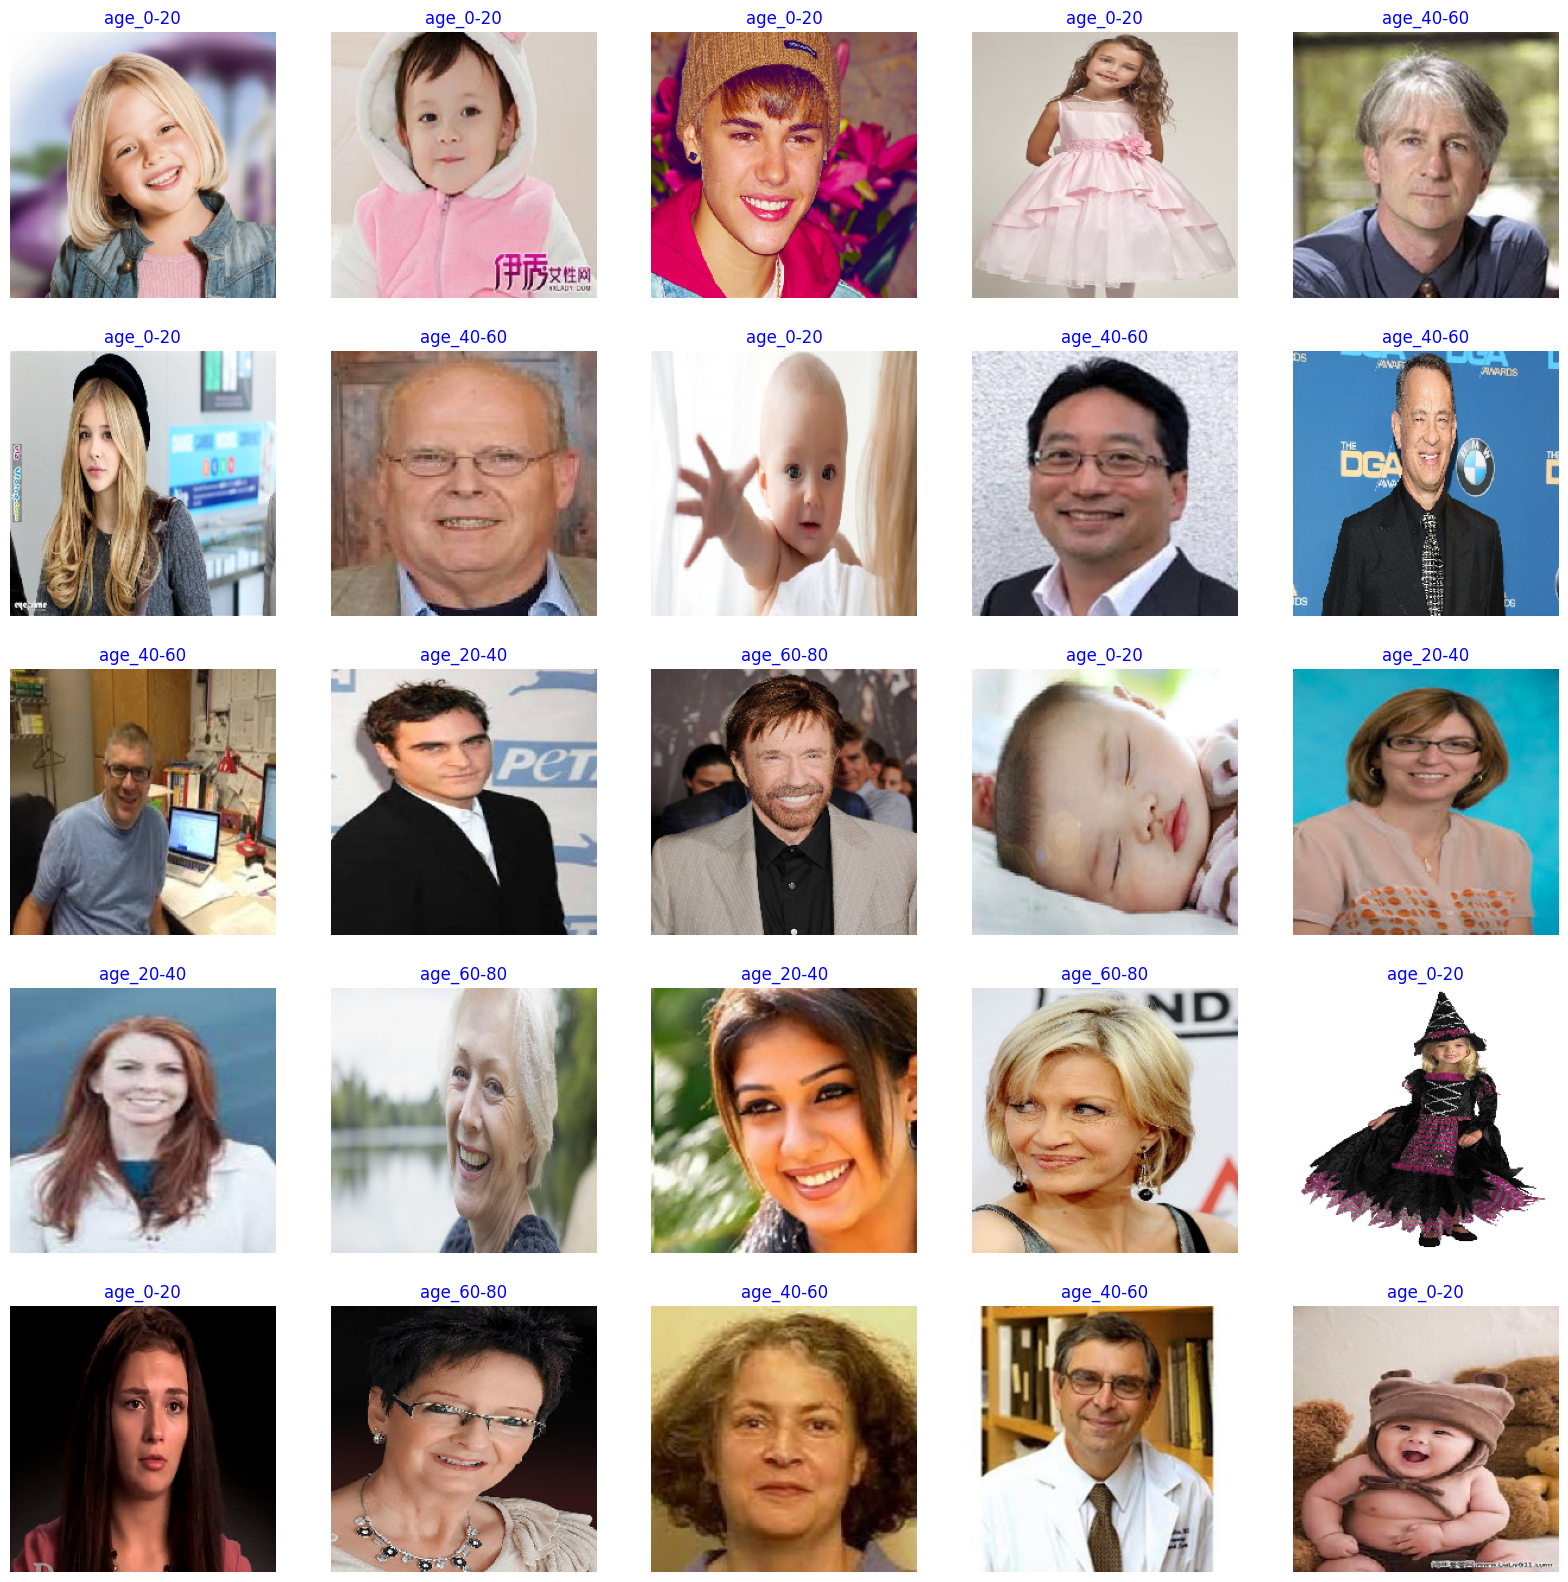

In [12]:
g_dict = train_gen.class_indices      # defines dictionary {'class': index}
classes = list(g_dict.keys())       # defines list of dictionary's kays (classes), classes names : string
images, labels = next(train_gen)      # get a batch size samples from the generator

# calculate number of displayed samples
length = len(labels)        # length of batch size
sample = min(length, 25)    # check if sample less than 25 images

plt.figure(figsize= (20, 20))
for i in range(sample):
    plt.subplot(5, 5, i + 1)
    image = images[i] / 255       # scales data to range (0 - 255)
    plt.imshow(image)
    index = np.argmax(labels[i])  # get image index
    class_name = classes[index]   # get class of image
    plt.title(class_name, color= 'blue', fontsize= 12)
    plt.axis('off')
plt.show()

# Model Structure

**Generic Model Creation**

In [19]:
# Create Model Structure
img_size = (180, 180)
channels = 3
img_shape = (img_size[0], img_size[1], channels)
class_count = len(list(train_gen.class_indices.keys())) # to define number of classes in dense layer

# create pre-trained model (you can built on pretrained model such as :  efficientnet, VGG , Resnet )
# we will use efficientnetb3 from EfficientNet family.
base_model = tf.keras.applications.efficientnet.EfficientNetB3(include_top= False, weights= "imagenet", input_shape= img_shape, pooling= 'max')

model = Sequential([
    base_model,
    BatchNormalization(axis= -1, momentum= 0.99, epsilon= 0.001),
    Dense(256, kernel_regularizer= regularizers.l2(l= 0.016), activity_regularizer= regularizers.l1(0.006),
                bias_regularizer= regularizers.l1(0.006), activation= 'relu'),
    Dropout(rate= 0.45, seed= 123),
    Dense(class_count, activation= 'softmax')
])

model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb3 (Functional  (None, 1536)              10783535  
 )                                                               
                                                                 
 batch_normalization_2 (Bat  (None, 1536)              6144      
 chNormalization)                                                
                                                                 
 dense_4 (Dense)             (None, 256)               393472    
                                                                 
 dropout_2 (Dropout)         (None, 256)               0         
                                                                 
 dense_5 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 11184179 (42.66 MB)
Trainable params: 11

# Train model

In [20]:
epochs = 10   # number of all epochs in training

history = model.fit(x= train_gen, epochs= epochs, verbose= 1, validation_data= valid_gen,
                    validation_steps= None, shuffle= False)

Epoch 1/10
243/243 [==============================] - 180s 545ms/step - loss: 6.3826 - accuracy: 0.6898 - val_loss: 4.4749 - val_accuracy: 0.7809
Epoch 2/10
243/243 [==============================] - 127s 523ms/step - loss: 3.3695 - accuracy: 0.8161 - val_loss: 2.5635 - val_accuracy: 0.8170
Epoch 3/10
243/243 [==============================] - 128s 526ms/step - loss: 1.8950 - accuracy: 0.8711 - val_loss: 1.5818 - val_accuracy: 0.8015
Epoch 4/10
243/243 [==============================] - 127s 522ms/step - loss: 1.0659 - accuracy: 0.9128 - val_loss: 1.0949 - val_accuracy: 0.8007
Epoch 5/10
243/243 [==============================] - 127s 522ms/step - loss: 0.6509 - accuracy: 0.9372 - val_loss: 0.8604 - val_accuracy: 0.7981
Epoch 6/10
243/243 [==============================] - 127s 524ms/step - loss: 0.4472 - accuracy: 0.9509 - val_loss: 0.7791 - val_accuracy: 0.8153
Epoch 7/10
243/243 [==============================] - 128s 525ms/step - loss: 0.3522 - accuracy: 0.9615 - val_loss: 0.7508 -

**Display model performance**

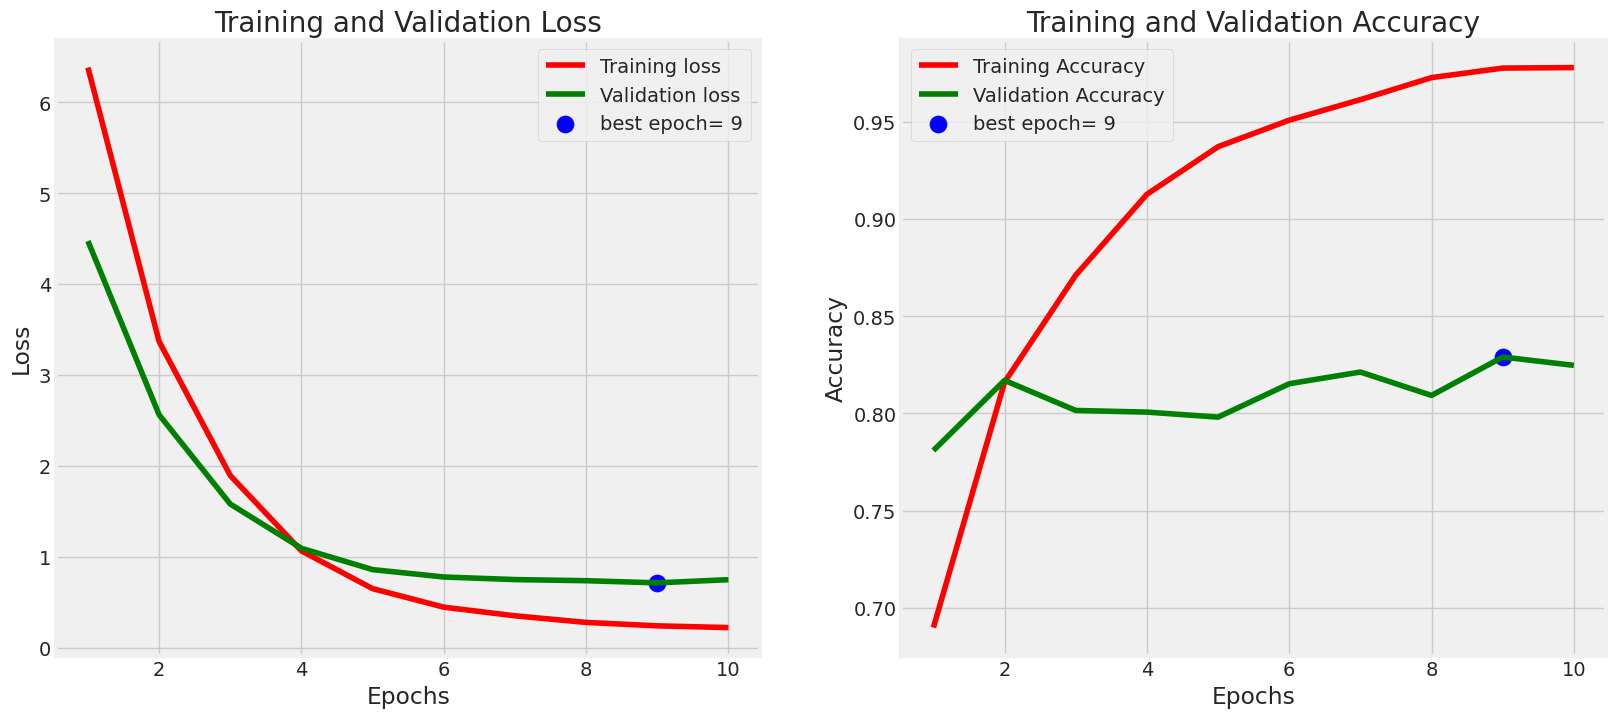

In [22]:
# Define needed variables
tr_acc = history.history['accuracy']
tr_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
index_loss = np.argmin(val_loss)
val_lowest = val_loss[index_loss]
index_acc = np.argmax(val_acc)
acc_highest = val_acc[index_acc]
Epochs = [i+1 for i in range(len(tr_acc))]
loss_label = f'best epoch= {str(index_loss + 1)}'
acc_label = f'best epoch= {str(index_acc + 1)}'
# Plot training history
plt.figure(figsize= (20, 8))
plt.style.use('fivethirtyeight')
plt.subplot(1, 2, 1)
plt.plot(Epochs, tr_loss, 'r', label= 'Training loss')
plt.plot(Epochs, val_loss, 'g', label= 'Validation loss')
plt.scatter(index_loss + 1, val_lowest, s= 150, c= 'blue', label= loss_label)
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(Epochs, tr_acc, 'r', label= 'Training Accuracy')
plt.plot(Epochs, val_acc, 'g', label= 'Validation Accuracy')
plt.scatter(index_acc + 1 , acc_highest, s= 150, c= 'blue', label= acc_label)
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()


plt.tight_layout
plt.show()

# Evaluate model

In [23]:
ts_length = len(test_df)
test_batch_size = max(sorted([ts_length // n for n in range(1, ts_length + 1) if ts_length%n == 0 and ts_length/n <= 80]))
test_steps = ts_length // test_batch_size

train_score = model.evaluate(train_gen, steps= test_steps, verbose= 1)
valid_score = model.evaluate(valid_gen, steps= test_steps, verbose= 1)
test_score = model.evaluate(test_gen, steps= test_steps, verbose= 1)
print("Train Loss: ", train_score[0])
print("Train Accuracy: ", train_score[1])
print('-' * 20)
print("Validation Loss: ", valid_score[0])
print("Validation Accuracy: ", valid_score[1])
print('-' * 20)
print("Test Loss: ", test_score[0])
print("Test Accuracy: ", test_score[1])

37/97 [==========>...................] - ETA: 11s - loss: 0.7495 - accuracy: 0.8247

97/97 [==============================] - 6s 45ms/step - loss: 0.7155 - accuracy: 0.8222
Train Loss:  0.16707965731620789
Train Accuracy:  0.9938788414001465
--------------------
Validation Loss:  0.7495389580726624
Validation Accuracy:  0.8247422575950623
--------------------
Test Loss:  0.7155000567436218
Test Accuracy:  0.8221649527549744


**Get Predictions**

In [24]:
preds = model.predict_generator(test_gen)
y_pred = np.argmax(preds, axis=1)

**Confusion Matrics and Classification Report**

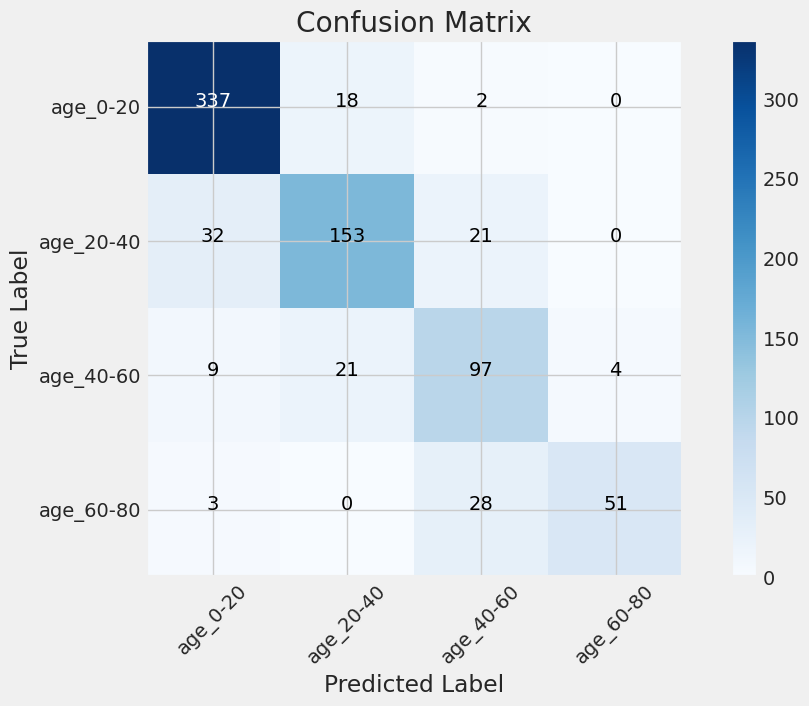

In [28]:
g_dict = test_gen.class_indices
classes = list(g_dict.keys())

# Confusion matrix
cm = confusion_matrix(test_gen.classes, y_pred)

plt.figure(figsize= (10, 7))
plt.imshow(cm, interpolation= 'nearest', cmap= plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation= 45)
plt.yticks(tick_marks, classes)
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j], horizontalalignment= 'center', color= 'white' if cm[i, j] > thresh else 'black')

plt.tight_layout()
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

plt.show()


In [29]:
# Classification report
print(classification_report(test_gen.classes, y_pred, target_names= classes))

              precision    recall  f1-score   support

    age_0-20       0.88      0.94      0.91       357
   age_20-40       0.80      0.74      0.77       206
   age_40-60       0.66      0.74      0.70       131
   age_60-80       0.93      0.62      0.74        82

    accuracy                           0.82       776
   macro avg       0.82      0.76      0.78       776
weighted avg       0.83      0.82      0.82       776



**Save model**

In [21]:
#Save the model
model.save('age_predict.h5')

# Prediction using loaded_model

In [30]:
loaded_model = tf.keras.models.load_model('/content/age_predict.h5', compile=False)
loaded_model.compile(Adamax(learning_rate= 0.001), loss= 'categorical_crossentropy', metrics= ['accuracy'])

In [40]:
image_path = '/content/images.jpg'
image = Image.open(image_path)

# Preprocess the image
img = image.resize((180,180))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0)

# Make predictions
predictions = loaded_model.predict(img_array)
class_labels = classes
score = tf.nn.softmax(predictions[0])
print(f"{class_labels[tf.argmax(score)]}")

1/1 [==============================] - 0s 30ms/step
age_0-20


If you found it helpful, do upvote

Feel free to comment

I would love to have suggestions.